In [175]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

READ IN FILE

In [176]:
df = pd.read_excel('../data/FY2010_20_Active_Component_Accessions_Non_PriorSvc_Census_Region_v1.xlsx')

In [177]:
df

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.900000,3139,12.100000,19907,12.700000,57074.685716,18.20,18.30,18.20
1,New England Division,2010,4544,3.500000,705,2.700000,5249,3.400000,58038.261498,4.70,4.70,4.70
2,Middle Atlantic Division,2010,12224,9.400000,2434,9.400000,14658,9.400000,56733.873756,13.50,13.60,13.60
3,MIDWEST REGION,2010,27041,20.800000,4601,17.700000,31642,20.200000,45776.871746,22.40,22.30,22.30
4,East North Central Division,2010,18686,14.300000,3221,12.400000,21907,14.000000,45133.884500,15.60,15.60,15.60
...,...,...,...,...,...,...,...,...,...,...,...,...
146,West South Central Division,2020,18056,15.240000,4319,15.372842,22375,15.267202,60305.367844,12.83,13.33,10.08
147,WEST REGION,2020,28978,24.462059,6772,24.103933,35750,24.393406,69650.761866,24.87,23.69,24.28
148,Mountain Division,2020,9680,8.171466,2332,8.300409,12012,8.196184,57141.732470,8.42,7.43,7.93
149,Pacific Division,2020,19298,16.290594,4440,15.803524,23738,16.197222,75477.887476,16.45,16.26,16.35


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   division                    151 non-null    object 
 1   Year                        151 non-null    int64  
 2   DoD_Male                    151 non-null    int64  
 3   DoD_Male_Percentage         151 non-null    float64
 4   DoD_Female                  151 non-null    int64  
 5   DoD_Female_Percentage       151 non-null    float64
 6   DoD_Total                   151 non-null    int64  
 7   DoD_Total_Percentage        151 non-null    float64
 8   GDP_Per_Capita              151 non-null    float64
 9   Civilian_Male_Percentage    150 non-null    float64
 10  Civilian_Female_Percentage  150 non-null    float64
 11  Civilian_Total_Percentage   150 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 14.3+ KB


In [150]:
df[['division', 'Year', 'DoD_Total']]

,division,Year,DoD_Total
0,NORTHEAST REGION,2010,19907
1,New England Division,2010,5249
2,Middle Atlantic Division,2010,14658
3,MIDWEST REGION,2010,31642
4,East North Central Division,2010,21907
...,...,...,...
146,West South Central Division,2020,22375
147,WEST REGION,2020,35750
148,Mountain Division,2020,12012
149,Pacific Division,2020,23738


In [151]:
df[df['division'].str.contains('UNITED STATES TOTAL')]

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
13,UNITED STATES TOTAL,2010,130274,100.0,26015,100.0,156289,100.0,48314.731954,100.0,100.0,100.0
27,UNITED STATES TOTAL,2011,124824,100.0,25099,100.0,149923,100.0,49709.105728,100.0,100.0,100.0
41,UNITED STATES TOTAL,2012,125730,100.0,24543,100.0,150273,100.0,51423.674744,100.0,100.0,100.0
55,UNITED STATES TOTAL,2013,135686,100.0,27469,100.0,163155,100.0,52932.620406,100.0,100.0,100.0
69,UNITED STATES TOTAL,2014,113440,100.0,24095,100.0,137535,100.0,54766.541499,100.0,100.0,100.0
83,UNITED STATES TOTAL,2015,117688,100.0,25901,100.0,143589,100.0,56413.693497,100.0,100.0,100.0
97,UNITED STATES TOTAL,2016,122199,100.0,27457,100.0,149656,100.0,57529.764866,100.0,100.0,100.0
110,UNITED STATES TOTAL,2017,128418,100.0,29336,100.0,157754,100.0,59573.026048,100.0,100.0,100.0
123,UNITED STATES TOTAL,2018,131396,100.0,30458,100.0,161854,100.0,62442.698444,100.0,100.0,100.0
137,UNITED STATES TOTAL,2019,130296,100.0,31531,100.0,161827,100.0,64724.474285,100.0,100.0,100.0


In [152]:
df_total = df[df['division'].str.contains('UNITED STATES TOTAL')]
df_total.head(2)

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
13,UNITED STATES TOTAL,2010,130274,100.0,26015,100.0,156289,100.0,48314.731954,100.0,100.0,100.0
27,UNITED STATES TOTAL,2011,124824,100.0,25099,100.0,149923,100.0,49709.105728,100.0,100.0,100.0


In [153]:
df_total[['division', 'Year', 'DoD_Total']]

,division,Year,DoD_Total
13,UNITED STATES TOTAL,2010,156289
27,UNITED STATES TOTAL,2011,149923
41,UNITED STATES TOTAL,2012,150273
55,UNITED STATES TOTAL,2013,163155
69,UNITED STATES TOTAL,2014,137535
83,UNITED STATES TOTAL,2015,143589
97,UNITED STATES TOTAL,2016,149656
110,UNITED STATES TOTAL,2017,157754
123,UNITED STATES TOTAL,2018,161854
137,UNITED STATES TOTAL,2019,161827


In [154]:
df_total_time = df_total[['division', 'Year', 'DoD_Total']]

Line graph:


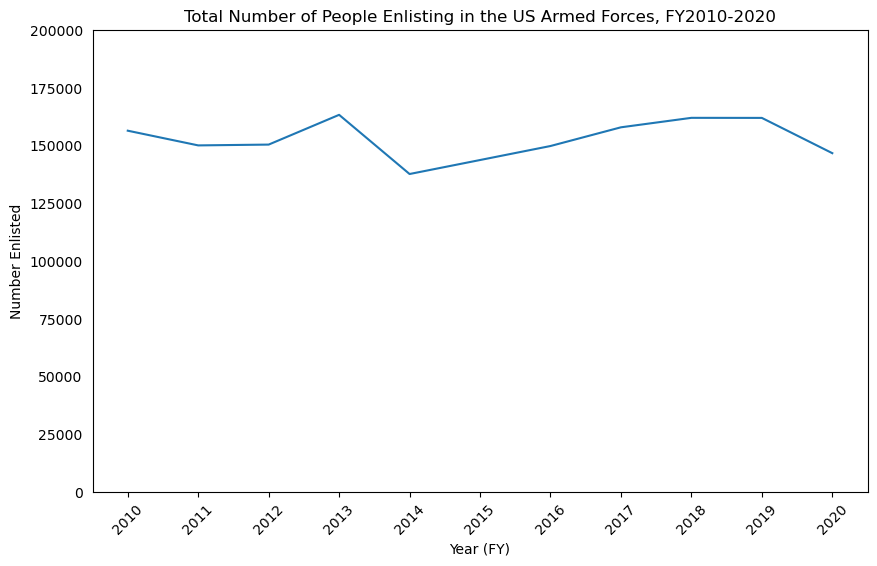

In [155]:
print('Line graph:')
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
plt.figure(figsize=(10,6))
plt.tick_params(left = False) 
plt.xticks(x, rotation=45)
plt.plot(df_total_time['Year'], df_total_time['DoD_Total'])
plt.ylim(0, 200000)
plt.xlabel('Year (FY)')
plt.ylabel('Number Enlisted')
plt.title('Total Number of People Enlisting in the US Armed Forces, FY2010-2020')
plt.show()


In [63]:
#https://download.militaryonesource.mil/12038/MOS/Reports/2020-demographics-report.pdf
#At a total of 1,333,822 DoD Active Duty members, the military force of 2020 is 5.9 percent smaller than it was in 2010, when there were 1,417,370 Active Duty members.

In [126]:
df2 = pd.read_excel('../data/FY2010_20_Active_Component_Accessions_Non_PriorSvc_Census_Region_v2.xlsx', nrows=153)

In [105]:
df2.tail(1)

,division,Year(FY),DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total,Civilian_Total_Percentage
150,UNITED STATES TOTAL,2020,118461,100.0,28095,100.0,146556,100.0,64724.474285,100.0,100.0,28766903.0,100.0


In [127]:
df2

,division,Year(FY),DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.900000,3139,12.100000,19907,12.700000,57074.685716,18.20,18.30,NaN,18.20
1,New England Division,2010,4544,3.500000,705,2.700000,5249,3.400000,58038.261498,4.70,4.70,NaN,4.70
2,Middle Atlantic Division,2010,12224,9.400000,2434,9.400000,14658,9.400000,56733.873756,13.50,13.60,NaN,13.60
3,MIDWEST REGION,2010,27041,20.800000,4601,17.700000,31642,20.200000,45776.871746,22.40,22.30,NaN,22.30
4,East North Central Division,2010,18686,14.300000,3221,12.400000,21907,14.000000,45133.884500,15.60,15.60,NaN,15.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,West South Central Division,2020,18056,15.240000,4319,15.372842,22375,15.267202,60305.367844,12.83,13.33,NaN,10.08
147,WEST REGION,2020,28978,24.462059,6772,24.103933,35750,24.393406,69650.761866,24.87,23.69,NaN,24.28
148,Mountain Division,2020,9680,8.171466,2332,8.300409,12012,8.196184,57141.732470,8.42,7.43,NaN,7.93
149,Pacific Division,2020,19298,16.290594,4440,15.803524,23738,16.197222,75477.887476,16.45,16.26,NaN,16.35


In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   division                    151 non-null    object 
 1   Year(FY)                    151 non-null    int64  
 2   DoD_Male                    151 non-null    int64  
 3   DoD_Male_Percentage         151 non-null    float64
 4   DoD_Female                  151 non-null    int64  
 5   DoD_Female_Percentage       151 non-null    float64
 6   DoD_Total                   151 non-null    int64  
 7   DoD_Total_Percentage        151 non-null    float64
 8   GDP_Per_Capita              151 non-null    float64
 9   Civilian_Male_Percentage    151 non-null    float64
 10  Civilian_Female_Percentage  151 non-null    float64
 11  Civilian_Total              11 non-null     float64
 12  Civilian_Total_Percentage   151 non-null    float64
dtypes: float64(8), int64(4), object(1)


In [129]:
df2_total = df2[df2['division'].str.contains('UNITED STATES TOTAL')]
df2_total.head(2)

,division,Year(FY),DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total,Civilian_Total_Percentage
13,UNITED STATES TOTAL,2010,130274,100.0,26015,100.0,156289,100.0,48314.731954,100.0,100.0,29004915.0,100.0
27,UNITED STATES TOTAL,2011,124824,100.0,25099,100.0,149923,100.0,49709.105728,100.0,100.0,29417774.0,100.0


In [130]:
df2_total[['Year(FY)', 'DoD_Total', 'Civilian_Total']]

,Year(FY),DoD_Total,Civilian_Total
13,2010,156289,29004915.0
27,2011,149923,29417774.0
41,2012,150273,29897280.0
55,2013,163155,29995912.0
69,2014,137535,29968446.0
83,2015,143589,29832941.0
97,2016,149656,29594656.0
110,2017,157754,29832941.0
123,2018,161854,29104724.0
137,2019,161827,29095743.0


In [131]:
#Since 2010 to 2020, there have been approximately 29M people aged 18-24, 
#and of that number anywhere from about 137,000 to 163,000 have volunteered to enlist in the Armed Forces. 

In [132]:
df2_total_3 = df2_total[['Year(FY)', 'DoD_Total', 'Civilian_Total']]

In [133]:
df2_total_3.head(2)

,Year(FY),DoD_Total,Civilian_Total
13,2010,156289,29004915.0
27,2011,149923,29417774.0


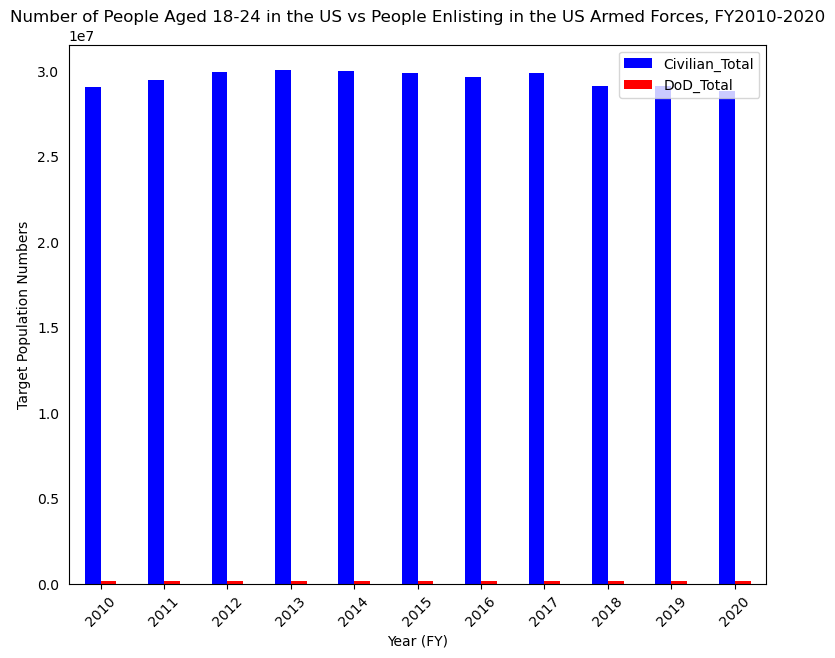

In [134]:
colors = ['blue', 'red']
df2_total_3 = pd.DataFrame(df2_total_3, columns=['Year(FY)', 'Civilian_Total', 'DoD_Total',])

df2_total_3.plot(x='Year(FY)', y=['Civilian_Total', 'DoD_Total',], kind = 'bar', color = colors, figsize = (9,7))
#plt.ylim(100000, 900000)
plt.xticks(rotation = 45)
plt.tick_params(left = False) 
plt.xlabel('Year (FY)')
plt.ylabel('Target Population Numbers')
plt.title('Number of People Aged 18-24 in the US vs People Enlisting in the US Armed Forces, FY2010-2020')
plt.show()    

In [135]:
#https://stackoverflow.com/questions/40877135/plotting-two-columns-of-dataframe-in-seaborn

In [136]:
#https://stackoverflow.com/questions/67235388/how-do-i-make-the-numbers-on-the-y-axis-show-values-in-millions-instead-of-in-sc
from matplotlib.ticker import NullFormatter

def formatter (x, pos):
    return str(round(x / 1e6, 1))
    

In [137]:
df2_total_3['DoD_Total']/df2_total_3['Civilian_Total']*100

13     0.538836
27     0.509634
41     0.502631
55     0.543924
69     0.458933
83     0.481310
97     0.505686
110    0.528791
123    0.556109
137    0.556188
150    0.509460
dtype: float64

In [138]:
round((df2_total_3['DoD_Total']/df2_total_3['Civilian_Total']*100), 2)

13     0.54
27     0.51
41     0.50
55     0.54
69     0.46
83     0.48
97     0.51
110    0.53
123    0.56
137    0.56
150    0.51
dtype: float64

In [139]:
df2_total_3['DoD_Civ_Tot_Per'] = round((df2_total_3['DoD_Total']/df2_total_3['Civilian_Total']*100), 2)
df2_total_3.head(2)

,Year(FY),Civilian_Total,DoD_Total,DoD_Civ_Tot_Per
13,2010,29004915.0,156289,0.54
27,2011,29417774.0,149923,0.51


In [140]:
#jobs['TPH_Percentage'] = round((jobs['total_production_hours']/jobs['total_production_hours'].sum()*100), 2)
#jobs.head(2)

In [141]:
df2_total_time = df2_total_3[['Year(FY)', 'DoD_Total', 'Civilian_Total']]

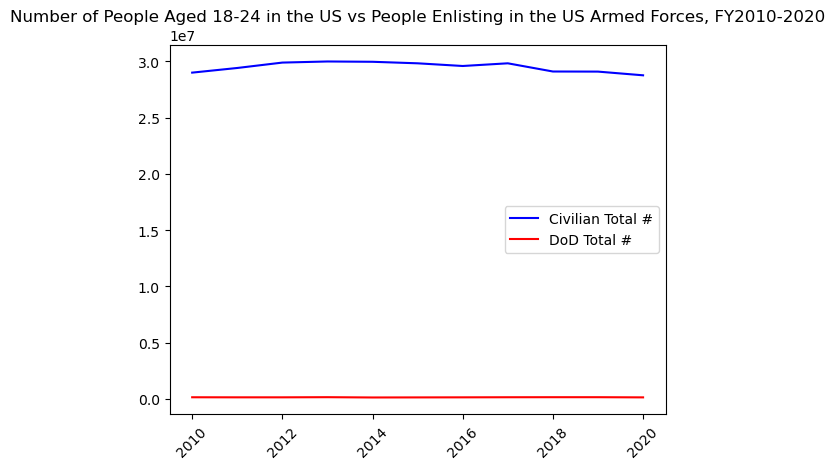

In [142]:
plt.plot(df2_total_time['Year(FY)'], df2_total_time['Civilian_Total'], label = 'Civilian Total #', color = 'blue')
plt.plot(df2_total_time['Year(FY)'], df2_total_time['DoD_Total'], label = 'DoD Total #', color = 'red')

#plt.ylim(100000, 900000)

plt.title('Number of People Aged 18-24 in the US vs People Enlisting in the US Armed Forces, FY2010-2020')
plt.xticks(rotation=45)
plt.legend()
plt.show()

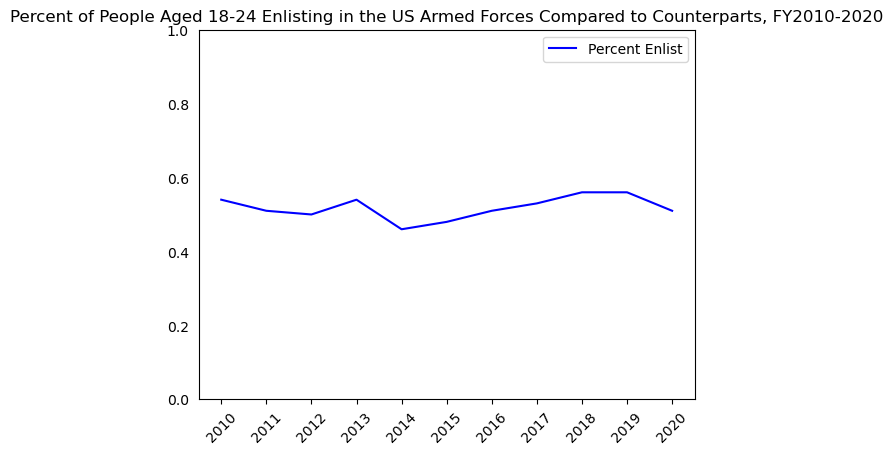

In [143]:

x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
plt.plot(df2_total_3['Year(FY)'], df2_total_3['DoD_Civ_Tot_Per'], label = 'Percent Enlist', color = 'blue')
plt.ylim(0, 1)
#plt.figure(figsize=(12,6))
plt.tick_params(left = False) 
#plt.xticks(x, rotation=45)
plt.title('Percent of People Aged 18-24 Enlisting in the US Armed Forces Compared to Counterparts, FY2010-2020')
plt.xticks(x, rotation=45)
plt.legend()
plt.show()

TRY TO EXAMINE GDPPC ACROSS TIME FOR REGIONS

In [156]:
df.GDP_Per_Capita.round()

0      57075.0
1      58038.0
2      56734.0
3      45777.0
4      45134.0
        ...   
146    60305.0
147    69651.0
148    57142.0
149    75478.0
150    64724.0
Name: GDP_Per_Capita, Length: 151, dtype: float64

In [157]:
df.GDP_Per_Capita = df.GDP_Per_Capita.round()
df.head(2)

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.9,3139,12.1,19907,12.7,57075.0,18.2,18.3,18.2
1,New England Division,2010,4544,3.5,705,2.7,5249,3.4,58038.0,4.7,4.7,4.7


In [158]:
df[['division', 'Year', 'GDP_Per_Capita']]

,division,Year,GDP_Per_Capita
0,NORTHEAST REGION,2010,57075.0
1,New England Division,2010,58038.0
2,Middle Atlantic Division,2010,56734.0
3,MIDWEST REGION,2010,45777.0
4,East North Central Division,2010,45134.0
...,...,...,...
146,West South Central Division,2020,60305.0
147,WEST REGION,2020,69651.0
148,Mountain Division,2020,57142.0
149,Pacific Division,2020,75478.0


Q1Are there regions/divisions/states where the proportion of volunteers for the US Armed Forces exceeds the population percentages 
for eligible individuals aged 18-24?

In [159]:
##I want all the rows where the column 'division' has 'REGION' in it
#https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
#Disney checkpoint Q15
df[df['division'].str.contains('REGION')]

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.900000,3139,12.100000,19907,12.700000,57075.0,18.20,18.30,18.20
3,MIDWEST REGION,2010,27041,20.800000,4601,17.700000,31642,20.200000,45777.0,22.40,22.30,22.30
6,SOUTH REGION,2010,55501,42.600000,12309,47.300000,67810,43.400000,44793.0,35.70,35.90,35.80
10,WEST REGION,2010,30964,23.800000,5966,22.900000,36930,23.600000,49554.0,23.80,23.50,23.70
14,NORTHEAST REGION,2011,16178,13.000000,3025,12.100000,19203,12.800000,57985.0,18.20,18.50,18.40
17,MIDWEST REGION,2011,25948,20.800000,4375,17.400000,30323,20.200000,47655.0,21.80,22.20,22.00
20,SOUTH REGION,2011,52990,42.500000,11956,47.600000,64946,43.300000,46176.0,35.80,36.00,35.90
24,WEST REGION,2011,29708,23.800000,5743,22.900000,35451,23.600000,50914.0,24.20,23.30,23.80
28,NORTHEAST REGION,2012,16430,13.100000,2945,12.000000,19375,12.900000,60596.0,18.50,18.40,18.40
31,MIDWEST REGION,2012,25922,20.600000,4440,18.100000,30362,20.200000,49610.0,21.20,21.80,21.50


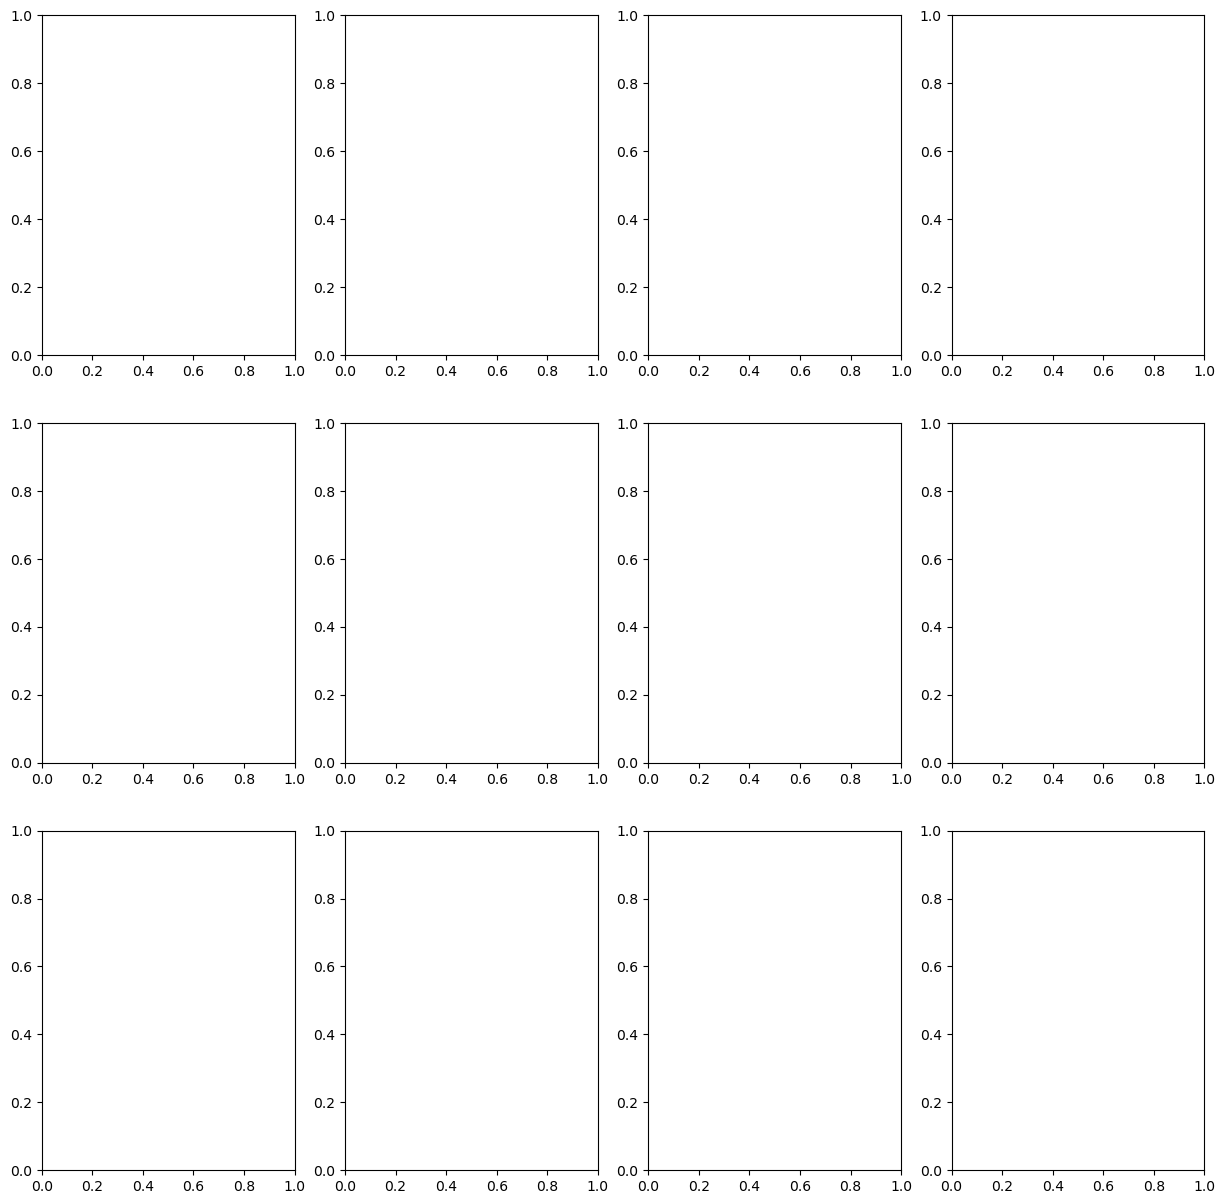

In [174]:
fig, ax = plt.subplots(figsize = (15, 15), nrows=3, ncols=4);
ax[0].bar(df['2010'])
ax[0].set_title('2010')

In [160]:
df_region = df[df['division'].str.contains('REGION')]
df_region.head(2)

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.9,3139,12.1,19907,12.7,57075.0,18.2,18.3,18.2
3,MIDWEST REGION,2010,27041,20.8,4601,17.7,31642,20.2,45777.0,22.4,22.3,22.3


In [161]:
#Filter 'df_region' by year

In [162]:
#movies_df = disney.loc[disney['type'] == 'Movie']
df_region.loc[df_region['Year'] == 2010]

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.9,3139,12.1,19907,12.7,57075.0,18.2,18.3,18.2
3,MIDWEST REGION,2010,27041,20.8,4601,17.7,31642,20.2,45777.0,22.4,22.3,22.3
6,SOUTH REGION,2010,55501,42.6,12309,47.3,67810,43.4,44793.0,35.7,35.9,35.8
10,WEST REGION,2010,30964,23.8,5966,22.9,36930,23.6,49554.0,23.8,23.5,23.7


In [163]:
df_region_10 = df_region.loc[df_region['Year'] == 2010]

In [164]:
#Compare dod_total_per with civ_total_per to see which is higher.
#Plot dod_total_per with civ_total_per by year 

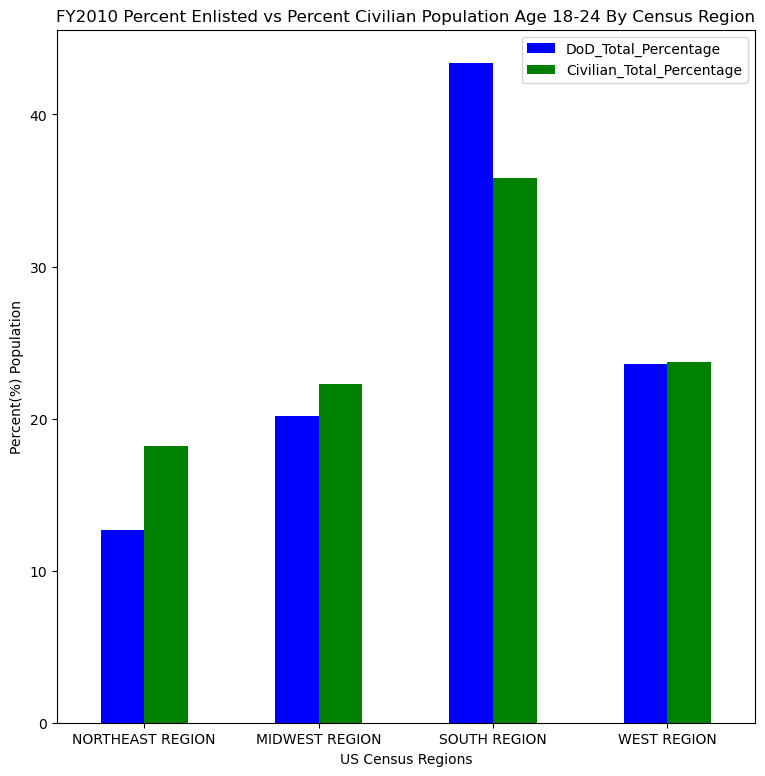

In [165]:
#https://www.geeksforgeeks.org/how-to-plot-multiple-data-columns-in-a-dataframe/
#https://www.geeksforgeeks.org/how-to-change-the-color-of-a-single-bar-in-a-bar-plot/
colors = ['blue', 'green']
df_region_10 = pd.DataFrame(df_region_10, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_10.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', color = colors, figsize = (9,9))
#plt.bar(color=colors)
plt.xticks(rotation = 0)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('FY2010 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()              

In [166]:
#This show that for 2010, the percentages of those enlisting in the NORTHEAST and NORTH CENTRAL Regions were lower than the percentages represented 
#in each region's population, except for the SOUTH.
#The WEST region was on par.  

In [167]:
df_region_11 = df_region.loc[df_region['Year'] == 2011]
df_region_11.head(2)

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
14,NORTHEAST REGION,2011,16178,13.0,3025,12.1,19203,12.8,57985.0,18.2,18.5,18.4
17,MIDWEST REGION,2011,25948,20.8,4375,17.4,30323,20.2,47655.0,21.8,22.2,22.0


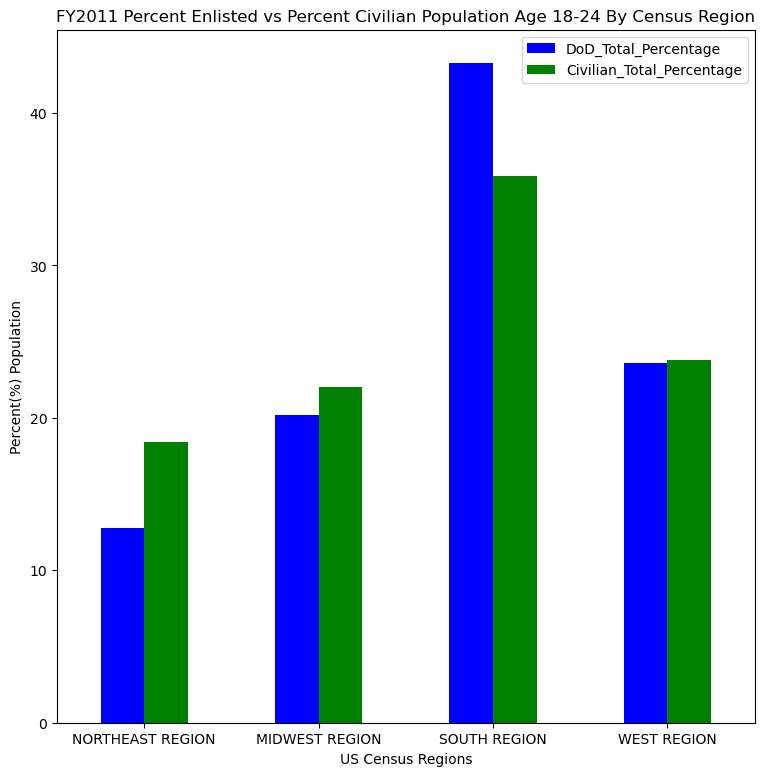

In [168]:
colors = ['blue', 'green']
df_region_11 = pd.DataFrame(df_region_11, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_11.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', color = colors, figsize = (9,9))

plt.xticks(rotation = 0)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('FY2011 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()

In [169]:
#No change
#This show that for 2011, the percentage of those enlisting was lower than the percentage represented in each region's popluation, except for the the SOUTH.

In [170]:
df_region_12 = df_region.loc[df_region['Year'] == 2012]

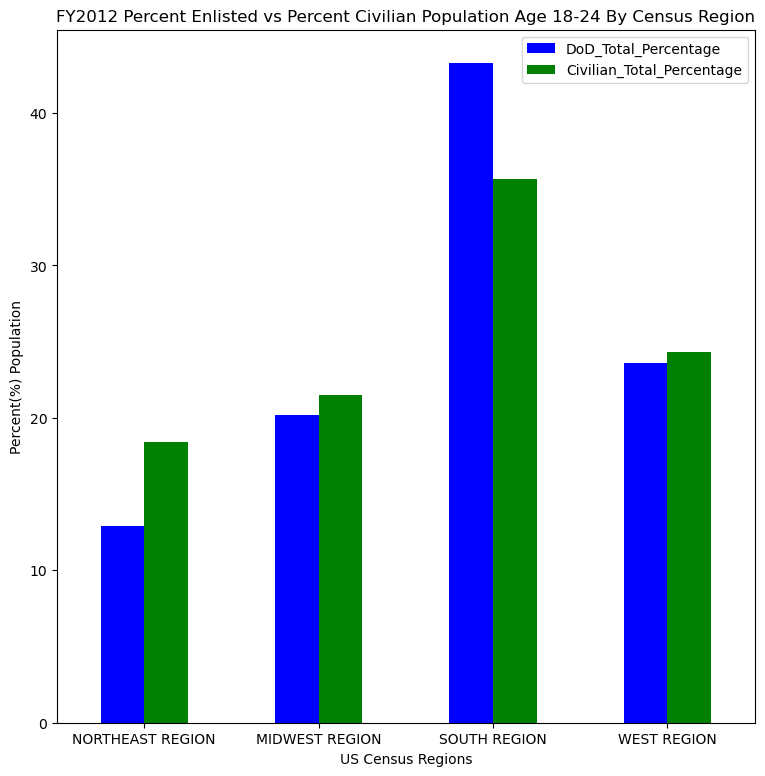

In [171]:
colors = ['blue', 'green']
df_region_12 = pd.DataFrame(df_region_12, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_12.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', color = colors, figsize = (9,9))

plt.xticks(rotation = 0)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('FY2012 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()

In [172]:
df_region_13 = df_region.loc[df_region['Year'] == 2013]

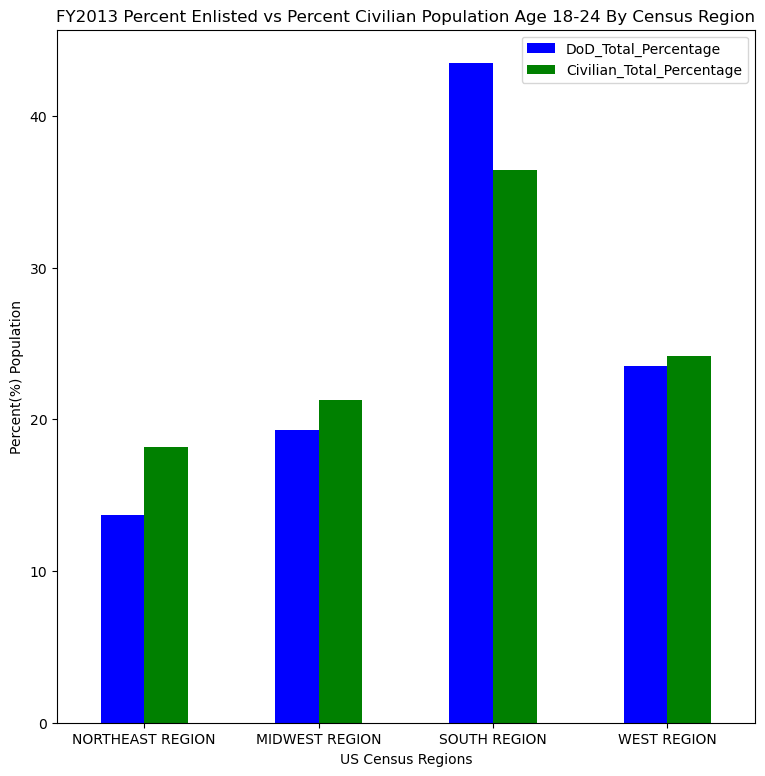

In [173]:
colors = ['blue', 'green']
df_region_13 = pd.DataFrame(df_region_13, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_13.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', color = colors, figsize = (9,9))

plt.xticks(rotation = 0)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('FY2013 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()

In [ ]:
df_region_14 = df_region.loc[df_region['Year'] == 2014]

In [ ]:
df_region_14 = pd.DataFrame(df_region_14, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_14.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', figsize = (10,10))

plt.xticks(rotation = 0)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('2014 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()

In [ ]:
df_region_15 = df_region.loc[df_region['Year'] == 2015]

In [ ]:
df_region_15 = pd.DataFrame(df_region_15, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_15.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', figsize = (10,10))

plt.xticks(rotation = 0)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('2015 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()

In [ ]:
df_region_16 = df_region.loc[df_region['Year'] == 2016]

In [ ]:
df_region_16 = pd.DataFrame(df_region_16, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_16.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', figsize = (10,10))

plt.xticks(rotation = 0)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('2016 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()

In [ ]:
df_region_17 = df_region.loc[df_region['Year'] == 2017]

In [ ]:
df_region_17 = pd.DataFrame(df_region_17, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_17.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', figsize = (10,10))

plt.xticks(rotation = 0)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('2017 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()

In [ ]:
df_region_18 = df_region.loc[df_region['Year'] == 2018]

In [ ]:
df_region_18 = pd.DataFrame(df_region_18, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_18.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', figsize = (10,10))

plt.xticks(rotation = 0)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('2018 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()

In [ ]:
df_region_19 = df_region.loc[df_region['Year'] == 2019]

In [ ]:
df_region_19 = pd.DataFrame(df_region_19, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_19.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', figsize = (10,10))

plt.xticks(rotation = 0)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('2019 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()

In [ ]:
df_region_20 = df_region.loc[df_region['Year'] == 2020]

In [ ]:
df_region_20 = pd.DataFrame(df_region_20, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_20.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', figsize = (10,10))

plt.xticks(rotation = 0)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('2020 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()

In [ ]:
df_region.plot(x='year', y=['dod_total_per', 'civ_total_per'], kind = 'bar', figsize = (10,10))

plt.xticks(rotation = 90)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('2010-2020 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show() 